### <span style="color:red">**IMPORTANT: Execute the cell below before proceeding:**</span> 

In [1]:
from resources309 import *
get_resources("perspective_exercise.py")

from py309.perspective_exercise import *
import matplotlib.pyplot as plt
from sympy import *
init_printing(use_latex='mathjax')

Resource check finished.


# Extra credit 2 tutorial

The extra credit 2 assignment asks you to paste an image into an area of another image in a way that applies an appropriate perspective adjustment. This notebook describes how to accomplish it. As an example we will be working with a two image files, `mural.jpg` and `magritte.jpg`. **Prior to executing the next cell make sure that you downloaded these image files from the __[course website](http://www.math.buffalo.edu/~badzioch/MTH309/homework.html#extra-credit-2)__  and placed them in the same directory as this notebook.** The code below reads these image files and assigns their content variables:

In [2]:
#read mural.jpg file
mural = plt.imread("mural.jpg")

#read magritte.jpg file
magritte = plt.imread("magritte.jpg")

Below we display the first image: 

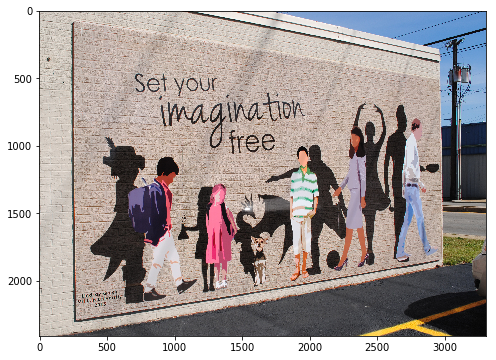

In [3]:
# this sets the width and height of the displayed image 
plt.figure(figsize = (8,6)) 

#show the image
plt.imshow(mural)
plt.show()

Our goal will be to replace the mural depicted on this image with the second image, which is a painting by Ren&eacute; Magritte:

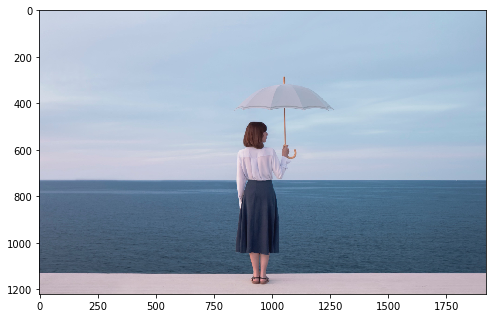

In [4]:
# this sets the width and height of the displayed image 
plt.figure(figsize = (8,6)) 

#show the image
plt.imshow(magritte)
plt.show()

In order to correctly paste the painting into the image of the mural, we will need to compute the change of basis matrix from the mural coordinates to the camera coordinates. For this purpose we need to know pixel coordinates of the corners of the mural in the mural image. The following command will be helpful, since it displays the images in an interactive way and shows pixel coordinates:

In [5]:
%matplotlib notebook

Once the above command is executed all images will be shown in an interactive mode:

<IPython.core.display.Javascript object>


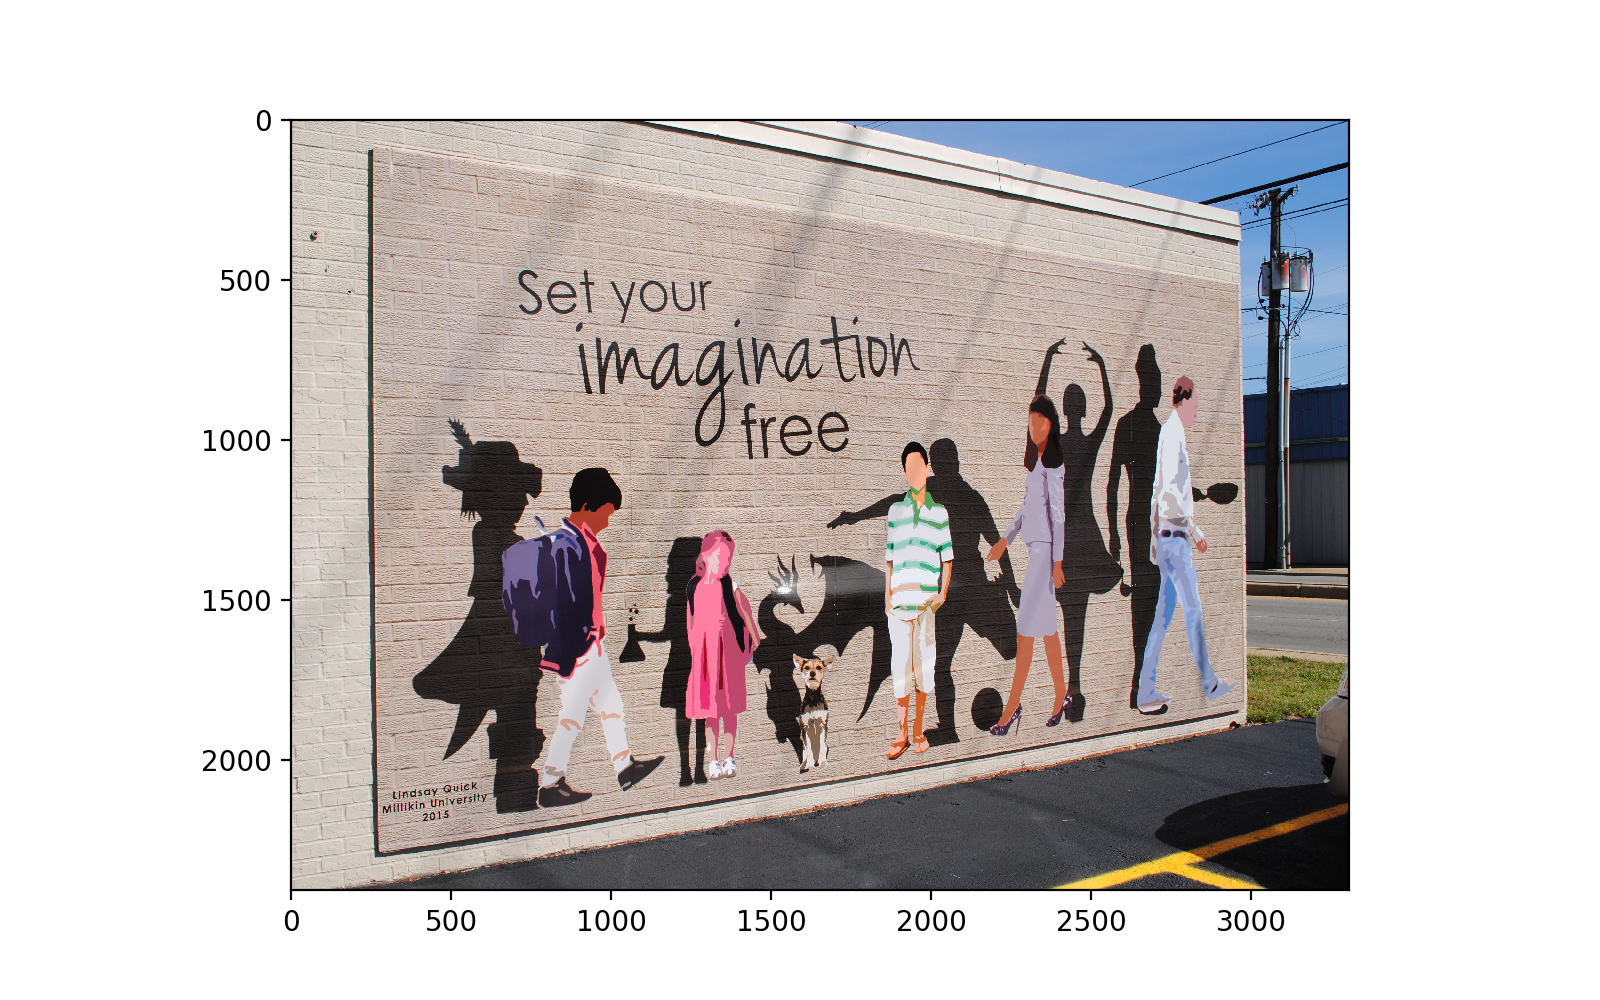

In [6]:
#set the width and height of the displayed image 
plt.figure(figsize = (8,5)) 

#show the image
plt.imshow(mural)
plt.show()

<p></p>

The buttons below the image let us manipulate the display. After clicking on the white square button (the second from the right) we can select a rectangular area of the image to zoom on. The house button (the first from the left) brings back the original view of the image.

<img src="https://raw.githubusercontent.com/bbadzioch/MTH309_F2018/master/supplements/matplotlib_notebook_icons.png" style="width:200pt; ">

When the cursor is on the image, x and y coordinates of the pixel under the cursor are displayed under the image, on the right side. The three numbers in the square brackets describe the color of the pixel (which is not needed for this assignment).

<img src="https://raw.githubusercontent.com/bbadzioch/MTH309_F2018/master/supplements/pixel_coordinates.png" style="width:500pt;  box-shadow: 0 4px 6px 0 rgba(0, 0, 0, 0.2), 0 6px 6px 0 rgba(0, 0, 0, 0.19);">


<p></p>

**Note.** Clicking on the blue power button above the image turns off interactivity. to make the image display interactive again, re-execute the code displaying the image.  

Using the interactive image display we get the following approximate coordinates of the mural corners (rounded to the nearest integers):


|    <i></i>      | **x** | **y** |
|-----------------|-------|-------|
| **upper left**  | 258   | 72    |
| **upper right** | 2958  | 514   |
| **lower left**  | 274   | 2291  |
| **lower right** | 2975  | 1839  |


Using the above data we can compute the change of coordinates matrix from the mural coordinates to the camera coordinates. The procedure for doing it was explained in class. The change of coordinates matrix obtained as the result of these computations is as follows (all matrix entries are rounded to 3 decimal points, which is precise enough):

In [7]:
P = Matrix([[0.599, 0.403, -0.002], [154.626, 2811.541, 8.832], [43.151, 472.276, 1323.580]])
P

⎡ 0.599    0.403    -0.002 ⎤
⎢                          ⎥
⎢154.626  2811.541   8.832 ⎥
⎢                          ⎥
⎣43.151   472.276   1323.58⎦

The last step is to use the function `paste_image()` which produces the pasted image. This function takes three arguments:

- `background` = the name of the background image file
- `foreground` = the name of the image file which we want paste into the background image
- `coord_change` = the change of coordinates matrix from the background image coordinates to the camera coordinates.

In our case the `background` image file is `mural.jpg`, the `foreground` file is `magritte.jpg`, and the `coord_change` is the matrix `P` given above. Notice that names of both image files must be entered in quotes:

In [8]:
new_image = paste_image(background="mural.jpg", foreground="magritte.jpg", coord_change = P)

It remains to display the image computed above:

<IPython.core.display.Javascript object>


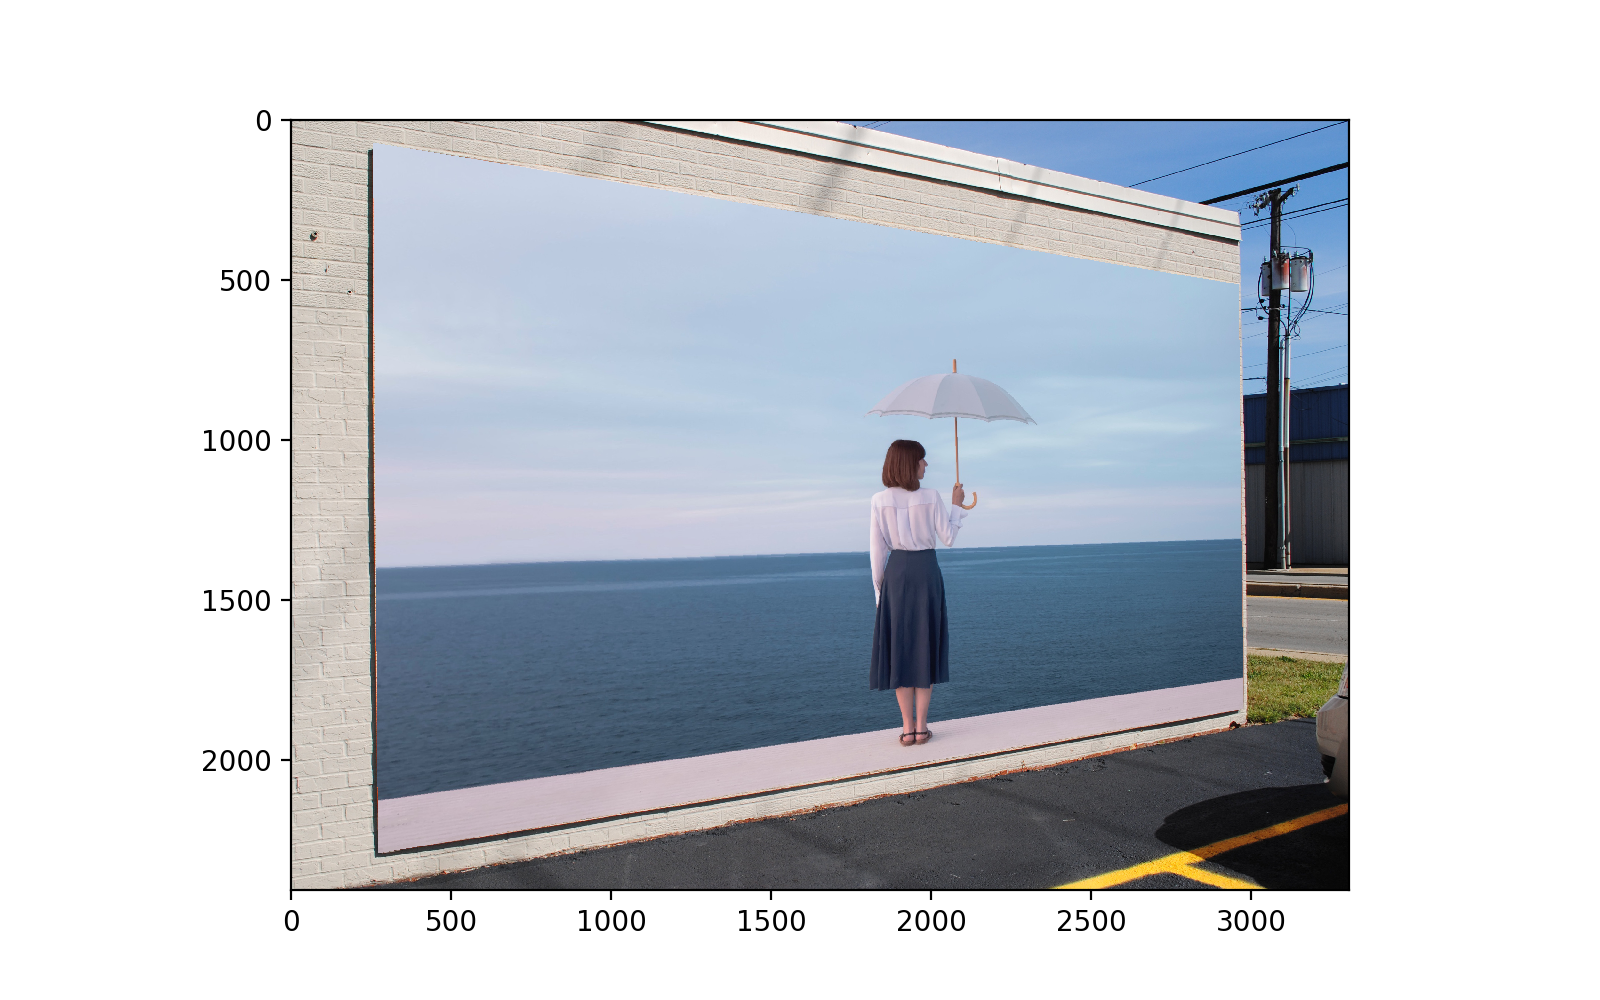

In [9]:
#set the width and height of the displayed image 
plt.figure(figsize = (8,5)) 

#show the image
plt.imshow(new_image)
plt.show()